# Outlier Detection

Performed on original dataset

Types:
* Visual approach: Boxplot
* Statistical approach: Grubbs' test ; Likelihood approach
* Density-based approach: DBSCAN ; LOF ; kNN
* Angle-based approach: ABOD
* Model-based approach: Isolation forest

#### Importing libraries

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Train and Test set

In [2]:
df_train = pd.read_csv('csv/train.csv')
df_test = pd.read_csv('csv/test.csv')

In [3]:
df_train_new = df_train.drop(['subject','Activity','ActivityName'], axis = 1)

# LOF

In [4]:
from sklearn.neighbors import LocalOutlierFactor

In [5]:
clf_LOF = LocalOutlierFactor(contamination=0.01, n_neighbors = 20) # n_neighbors = 20 is optimal value according to sklearn
outliers = clf_LOF.fit_predict(df_train_new)

In [6]:
clf_LOF.negative_outlier_factor_

array([-1.51250875, -1.04592516, -1.02306275, ..., -1.02502088,
       -1.02111953, -1.00732075])

In [7]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  74, 7278], dtype=int64))

In [8]:
np.where(outliers==-1)

(array([   0,   66,   67,   70,   71,  237,  238,  388,  389,  564,  870,
         872, 1020, 1062, 1194, 1209, 1308, 1343, 1369, 1425, 1513, 1523,
        1788, 1813, 1816, 1817, 1904, 1950, 2112, 2123, 2125, 2224, 2250,
        2413, 2440, 2451, 2511, 2531, 2532, 2871, 2911, 2937, 3050, 3074,
        3091, 3129, 3238, 3296, 3625, 3683, 3785, 3792, 3810, 3900, 3915,
        3934, 3935, 4281, 4393, 4537, 4539, 4580, 4729, 4730, 4744, 4828,
        4939, 5066, 5136, 5143, 5149, 5355, 5476, 7002], dtype=int64),)

In [9]:
clf_LOF.negative_outlier_factor_[np.where(outliers==-1)]

array([-1.51250875, -1.44784559, -1.32304935, -1.76979158, -1.75632535,
       -1.49435091, -1.45189441, -1.42504773, -1.40277195, -1.50302003,
       -1.31731551, -1.30462513, -1.28376933, -1.31911149, -1.35605065,
       -1.36398697, -1.344943  , -1.3058589 , -1.33307227, -1.30882298,
       -1.3073868 , -1.28689476, -1.34615713, -1.32413016, -1.28839286,
       -1.47867624, -1.74529324, -1.32595522, -1.41095223, -1.31498244,
       -1.34656021, -1.34336841, -1.28455338, -1.31302682, -1.27853757,
       -1.38975431, -1.27915142, -1.40334874, -1.5282831 , -1.32891496,
       -1.29613265, -1.44397904, -1.28252979, -1.29490094, -1.27840565,
       -1.34011233, -1.45979863, -1.32525614, -1.28273049, -1.30885295,
       -1.28199026, -1.40274149, -1.40911779, -1.32362698, -1.28885658,
       -1.4847566 , -1.45074094, -1.31523097, -1.33751744, -1.31361828,
       -1.28326321, -1.35807806, -1.5520981 , -1.73463948, -1.40796695,
       -1.29117857, -1.31220904, -1.67653791, -1.30528623, -1.28

In [10]:
max_val = np.max(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.2781536904668016

In [11]:
min_val = np.min(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])
min_val

-1.769791579297302

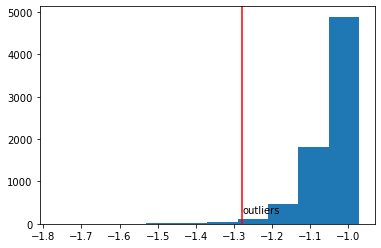

In [12]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.show()

#### Delete outliers

In [13]:
idx_outlier = np.where(outliers==-1)

In [14]:
for otl in idx_outlier:
    df_train.drop(otl, axis=0, inplace=True)

In [15]:
df_train.shape

(7278, 564)

#### Create a new csv called "df_train_

In [16]:
df_train.to_csv("csv/train_nooutlier.csv", index=False)

In [17]:
df_train_nooutlier = pd.read_csv('csv/train_nooutlier.csv')

In [18]:
df_train_nooutlier

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7274,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7275,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7276,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


# Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest

In [54]:
df_train.to_csv("csv/train_isoforest.csv", index=False)
df_test.to_csv("csv/test_isoforest.csv", index=False)

In [55]:
df_train_isoforest = pd.read_csv('csv/train_isoforest.csv')
df_test_isoforest = pd.read_csv('csv/test_isoforest.csv')

In [56]:
X_train = df_train.drop(['subject','ActivityName'], axis = 1)
y_train = df_train.ActivityName

In [57]:
X_test = df_test.drop(['subject','ActivityName'], axis = 1)
y_test = df_test.ActivityName

In [58]:
# Dinamic-> 1,2,3 & Static-> 4,5,6
X_train_dinamic = X_train[X_train['Activity']<=3]
X_train_static = X_train[X_train['Activity']>3]

X_test_dinamic = X_test[X_test['Activity']<=3]
X_test_static = X_test[X_test['Activity']>3]

In [59]:
# Dinamic
clf_ISOFOR = IsolationForest(contamination=0.01, random_state=0)
clf_ISOFOR.fit(X_train_dinamic)

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=0)

In [60]:
outliers = clf_ISOFOR.predict(X_test_dinamic)

In [61]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   1, 1386], dtype=int64))

In [62]:
np.where(outliers==-1)

(array([704], dtype=int64),)

In [63]:
# Static
clf_ISOFOR = IsolationForest(contamination=0.01, random_state=0)
clf_ISOFOR.fit(X_train_static)

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=0)

In [64]:
outliers = clf_ISOFOR.predict(X_test_static)

In [65]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  23, 1537], dtype=int64))

In [66]:
np.where(outliers==-1)

(array([ 148,  200,  216,  230,  272,  284,  355,  379,  407,  408,  409,
         500,  515,  664,  691,  692, 1249, 1250, 1264, 1265, 1269, 1270,
        1314], dtype=int64),)

# ABOD

In [42]:
from pyod.models.abod import ABOD

In [44]:
clf_ABOD = ABOD(contamination=0.01)

In [45]:
clf_ABOD.fit(df_train_new)

ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [46]:
clf_ABOD.decision_scores_

array([-1.72927883e-05, -1.59284556e-04, -2.67999582e-04, ...,
       -1.75294243e-04, -1.03815217e-04, -5.41070915e-05])

In [47]:
outliers = clf_ABOD.predict(df_train_new)

In [48]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([7202,  150], dtype=int64))

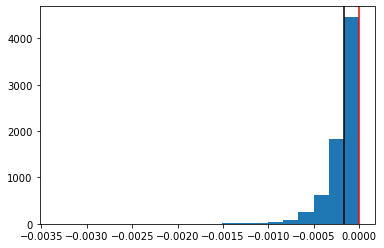

In [49]:
plt.hist(clf_ABOD.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD.decision_scores_[np.where(outliers==1)]), c='k')
plt.axvline(np.max(clf_ABOD.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()